In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
titanic_data = pd.read_csv("train.csv")

In [7]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

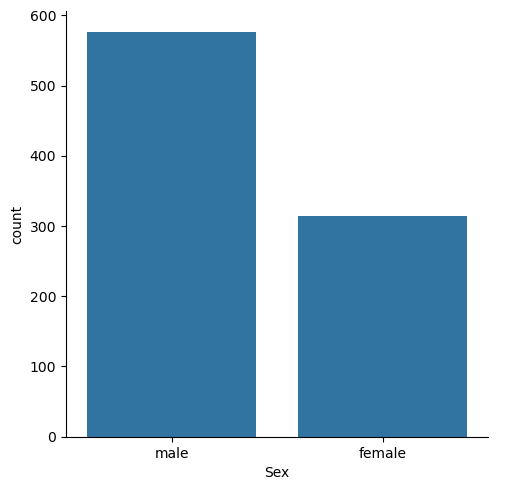

In [19]:
sns.catplot(x="Sex",data=titanic_data, kind="count")

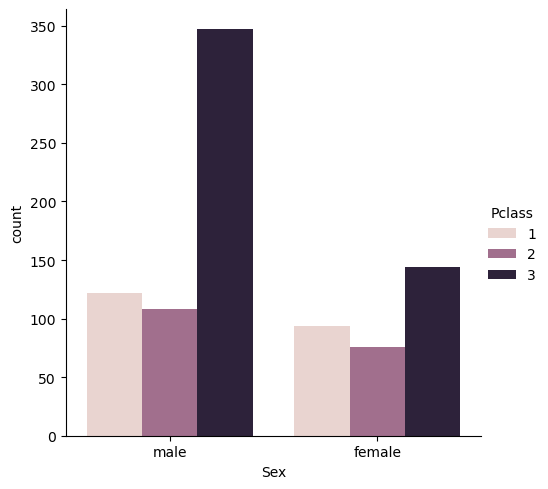

In [23]:
sns.catplot(x="Sex",data=titanic_data,hue="Pclass",kind="count")

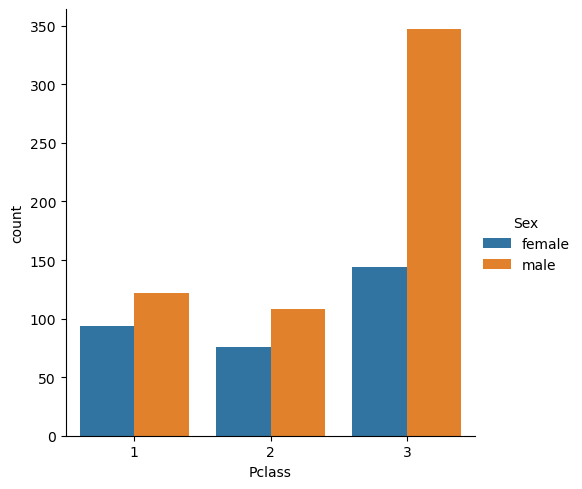

In [25]:
sns.catplot(x="Pclass",data=titanic_data,hue="Sex",kind="count")

In [27]:
#finding children
def male_female_child(passenger):
    age,sex = passenger

    if age<16:
        return "child"
    else:
        return sex

In [29]:
titanic_data["Person"] = titanic_data[["Age","Sex"]].apply(male_female_child,axis=1)

In [31]:
titanic_data[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


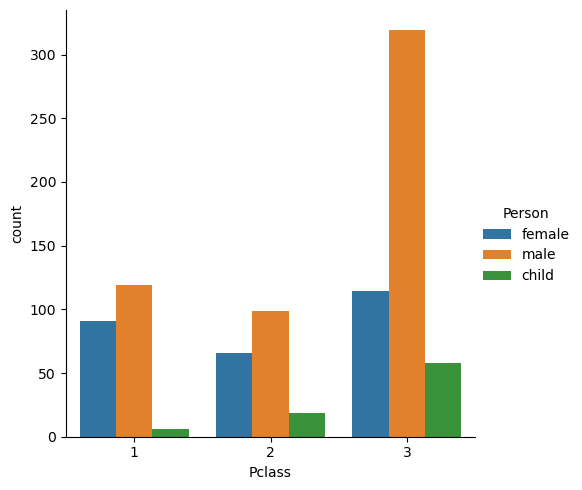

In [33]:
sns.catplot(x="Pclass",data=titanic_data,hue="Person",kind="count")

<Axes: >

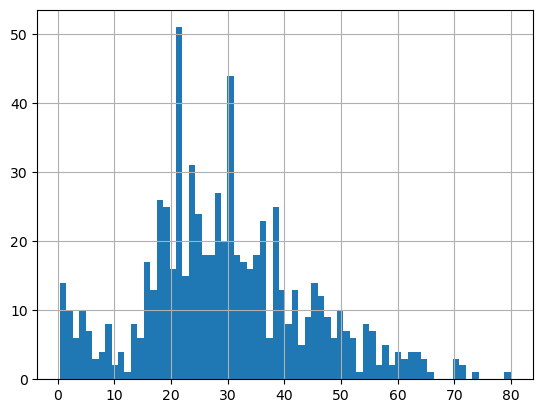

In [35]:
titanic_data["Age"].hist(bins=70)

In [37]:
titanic_data["Age"].mean()

29.69911764705882

In [41]:
titanic_data["Person"].value_counts()

Person
male      537
female    271
child      83
Name: count, dtype: int64

In [43]:
titanic_data.shape[0]

891

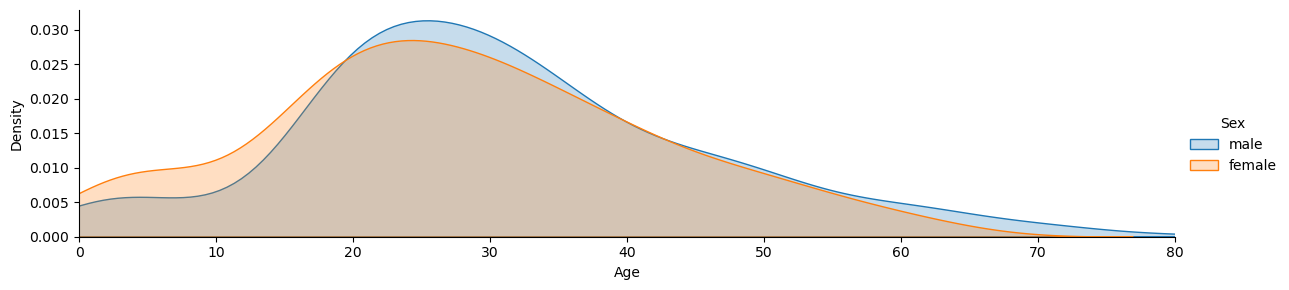

In [57]:
fig = sns.FacetGrid(titanic_data,hue="Sex",aspect=4)

fig.map(sns.kdeplot,"Age", fill=True)

oldest = titanic_data["Age"].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

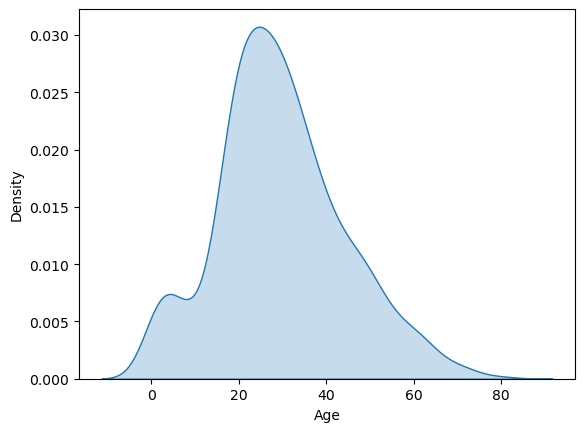

In [59]:
sns.kdeplot(titanic_data["Age"],fill=True)
plt.show()

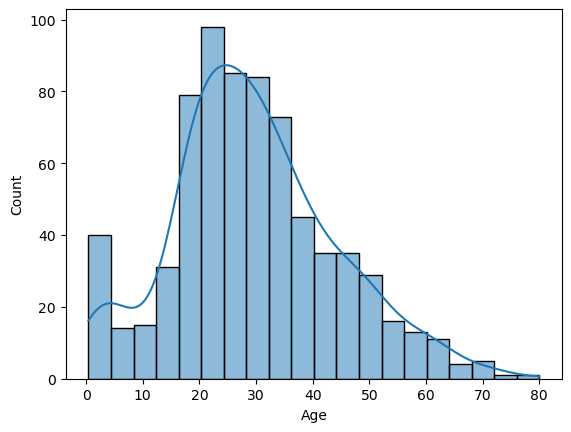

In [65]:
sns.histplot(titanic_data["Age"],kde=True)
plt.show()

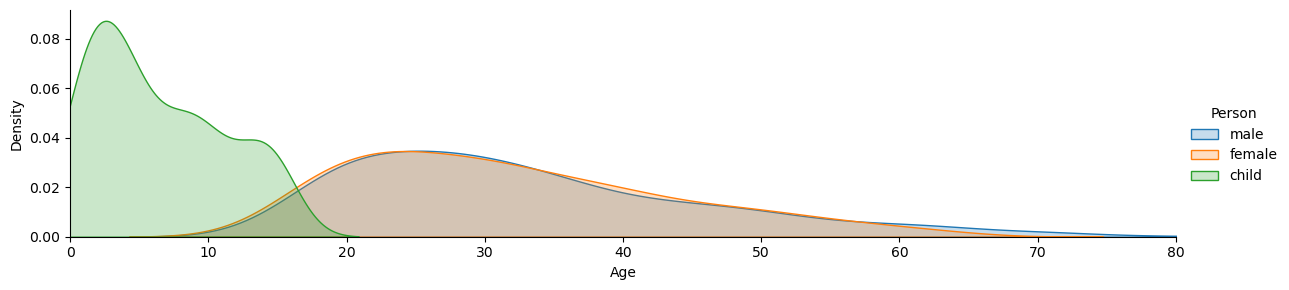

In [67]:
fig = sns.FacetGrid(titanic_data,hue="Person",aspect=4)

fig.map(sns.kdeplot,"Age", fill=True)

oldest = titanic_data["Age"].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [69]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [71]:
deck = titanic_data["Cabin"].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

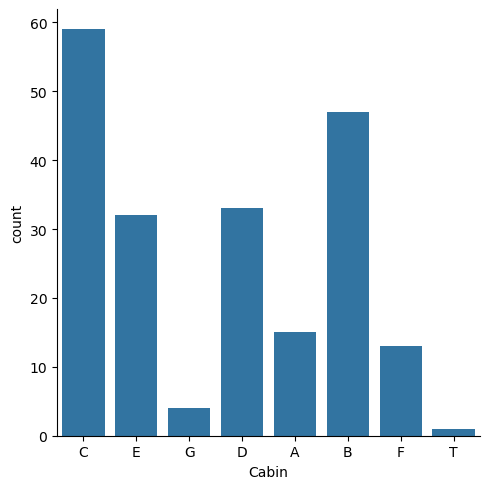

In [85]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ["Cabin"]

sns.catplot(x = "Cabin",data=cabin_df,kind="count",legend=False)

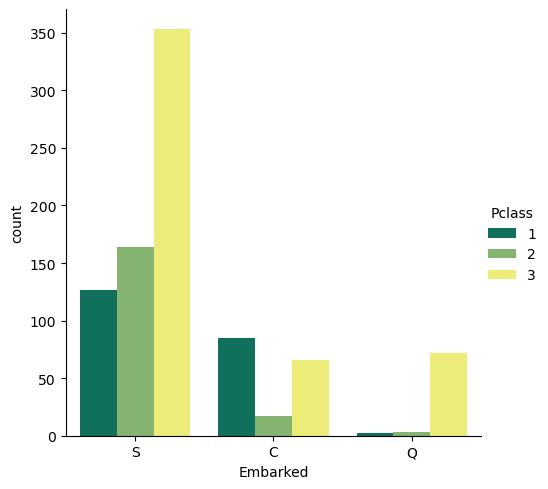

In [95]:
sns.catplot(x="Embarked",data=titanic_data,hue="Pclass",kind="count",palette="summer")

In [97]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [99]:
#who was alone
titanic_data["Alone"] = titanic_data.SibSp + titanic_data.Parch
titanic_data["Alone"]


0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [103]:
titanic_data["Alone"].loc[titanic_data["Alone"]>0] = "With Family"
titanic_data["Alone"].loc[titanic_data["Alone"]==0] = "Alone"

C:\Users\USER\AppData\Local\Temp\ipykernel_15844\3904706492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data["Alone"].loc[titanic_data["Alone"]>0] = "With Family"
C:\Users\USER\AppData\Local\Temp\ipykernel_15844\3904706492.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'With Family' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic_data["Alone"].loc[titanic_data["Alone"]>0] = "With Family"


In [105]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [107]:
titanic_data["Cabin"] = titanic_data["Cabin"].fillna(0)

In [109]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,male,Alone


C:\Users\USER\AppData\Local\Temp\ipykernel_15844\3102509332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Survivor",data=titanic_data,kind="count",palette="Set1")


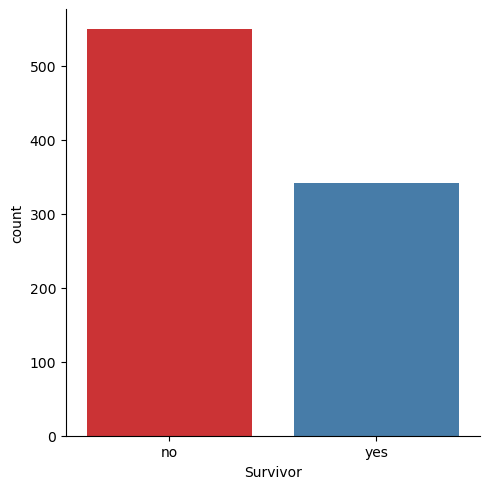

In [111]:
titanic_data["Survivor"] = titanic_data.Survived.map({0:"no",1:"yes"})
sns.catplot(x="Survivor",data=titanic_data,kind="count",palette="Set1")

In [115]:
#number of survivals
num_survivors = titanic_data['Survived'].sum()
print(num_survivors)

342


In [119]:
#number of death
num_death = titanic_data.query("Survived == 0").shape[0]
print(num_death)

549


In [121]:
#number of survivals with loc and shape
num_survivors = titanic_data.loc[titanic_data["Survived"] == 1].shape[0]
num_death = titanic_data.loc[titanic_data["Survived"]==0].shape[0]
print("survival: ",num_survivors)
print("death: ",num_death)

survival:  342
death:  549


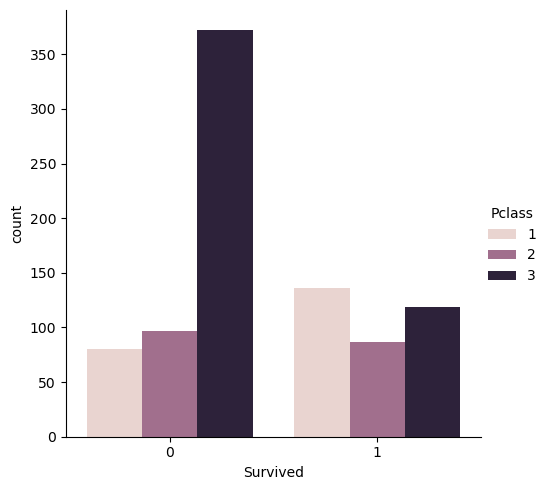

In [125]:
sns.catplot(x="Survived",data=titanic_data,hue="Pclass",kind="count")

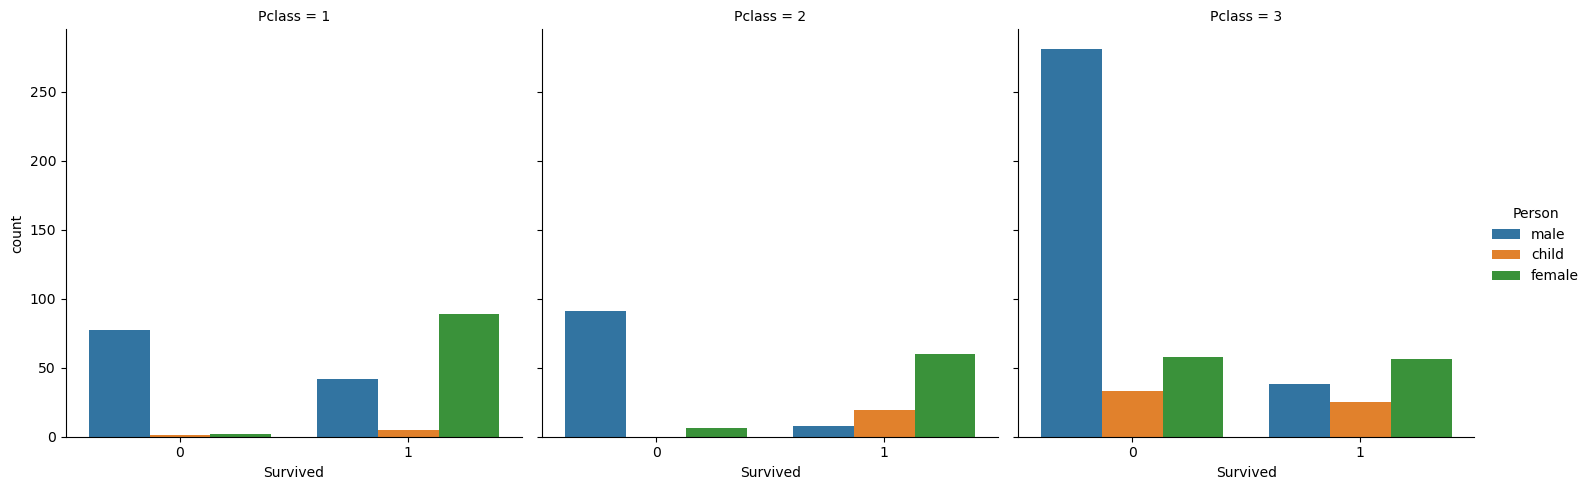

In [131]:
sns.catplot(x="Survived",data=titanic_data,col="Pclass",hue="Person",kind="count")

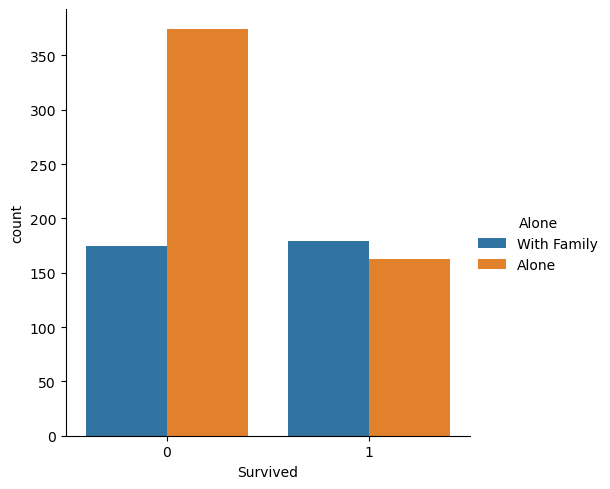

In [133]:
sns.catplot(x="Survived",data=titanic_data, hue="Alone",kind="count")